1. Import Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# 
df.shape

# Afficher les premières et dernières lignes
df.head()
df.tail()

# Vérifier la taille du dataset
print(f"Shape du dataset: {df.shape}")

# Vérifier les noms des colonnes
print(f"Noms des colonnes: {df.columns}")

# Obtenir un aperçu général des types de données et des valeurs manquantes
df.info()

# Vérifier le type des colonnes
df.dtypes

# 
n = 10  # Nombre d'échantillons souhaités
df.sample(n)


# Vérifier la présence de valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Shape du dataset: (30616, 46)
Noms des colonnes: Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal',
       'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electric

NumberofFloors                        83
NumberofBuildings                    294
ENERGYSTARScore                     7917
SiteEUIWN(kBtu/sf)                  1166
SiteEUI(kBtu/sf)                     856
SiteEnergyUse(kBtu)                  851
SiteEnergyUseWN(kBtu)               1161
SourceEUIWN(kBtu/sf)                1166
SourceEUI(kBtu/sf)                   856
LargestPropertyUseType                 8
LargestPropertyUseTypeGFA              3
SecondLargestPropertyUseType       13102
SecondLargestPropertyUseTypeGFA    13102
ThirdLargestPropertyUseType        23927
ThirdLargestPropertyUseTypeGFA     24088
Electricity(kWh)                     541
SteamUse(kBtu)                     29559
NaturalGas(therms)                 11448
ComplianceIssue                      345
Electricity(kBtu)                    541
NaturalGas(kBtu)                   11448
TotalGHGEmissions                    457
GHGEmissionsIntensity                459
dtype: int64

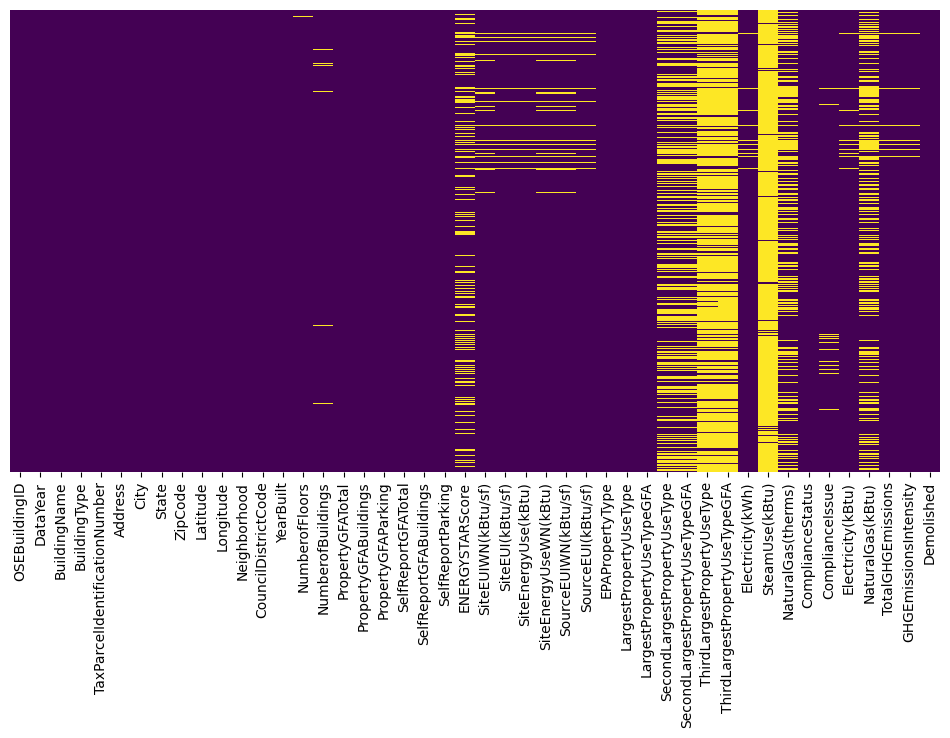

In [16]:
#Visualiser les valeurs manquantes avec un heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()



📊 Pourcentage de valeurs manquantes par colonne avant traitement :
SteamUse(kBtu)                     96.547557
ThirdLargestPropertyUseTypeGFA     78.677816
ThirdLargestPropertyUseType        78.151947
SecondLargestPropertyUseType       42.794617
SecondLargestPropertyUseTypeGFA    42.794617
NaturalGas(kBtu)                   37.392213
NaturalGas(therms)                 37.392213
ENERGYSTARScore                    25.859028
SiteEUIWN(kBtu/sf)                  3.808466
SourceEUIWN(kBtu/sf)                3.808466
SiteEnergyUseWN(kBtu)               3.792135
SiteEUI(kBtu/sf)                    2.795924
SourceEUI(kBtu/sf)                  2.795924
SiteEnergyUse(kBtu)                 2.779592
Electricity(kBtu)                   1.767050
Electricity(kWh)                    1.767050
GHGEmissionsIntensity               1.499216
TotalGHGEmissions                   1.492684
ComplianceIssue                     1.126862
NumberofBuildings                   0.960282
NumberofFloors                  

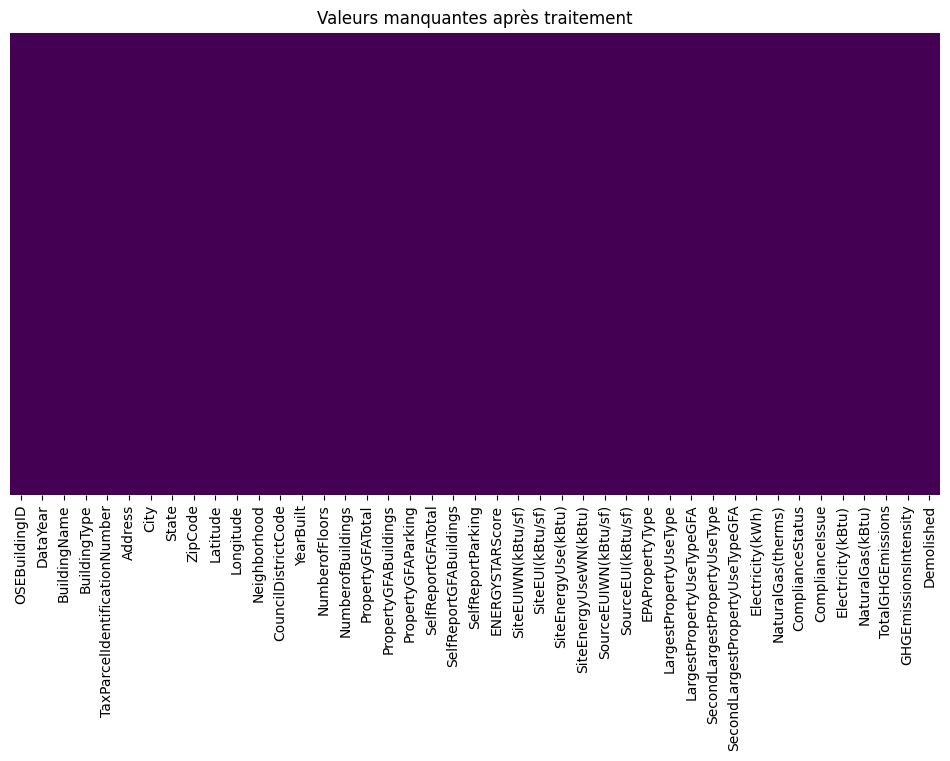

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Vérification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n📊 Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2️⃣ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n🗑️ Colonnes supprimées ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"🔄 Nouvelle shape du dataset après suppression : {df.shape}")

# 3️⃣ Imputation des valeurs numériques manquantes (médiane)
num_cols = df.select_dtypes(include=['number']).columns  # Sélection automatique des colonnes numériques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n✅ Imputation des valeurs numériques avec la médiane terminée.")

# 4️⃣ Imputation des valeurs catégoriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # Sélection automatique des colonnes catégoriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n✅ Imputation des valeurs catégoriques terminée.")

# 5️⃣ Vérification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\n🔍 Vérification finale des valeurs manquantes après traitement :")
if remaining_missing.empty:
    print("✅ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# 📊 Visualisation des valeurs manquantes après traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes après traitement")
plt.show()


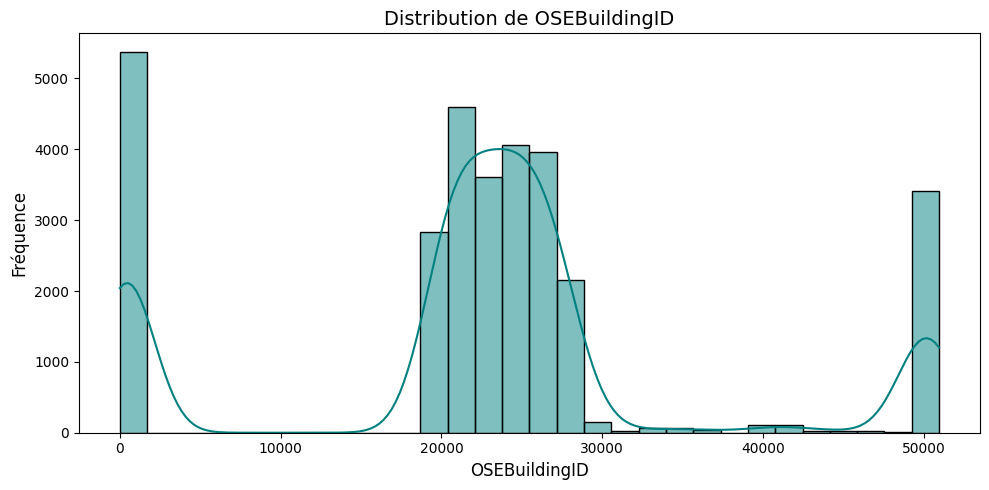

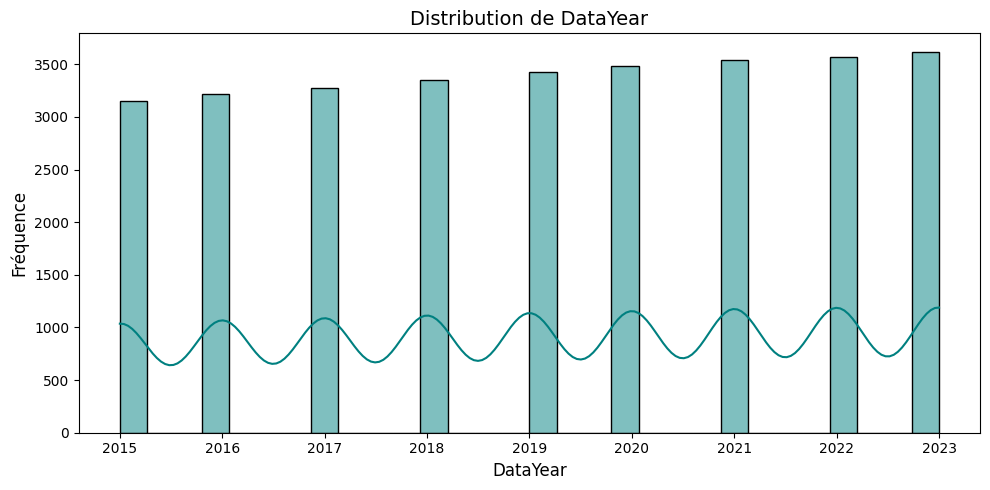

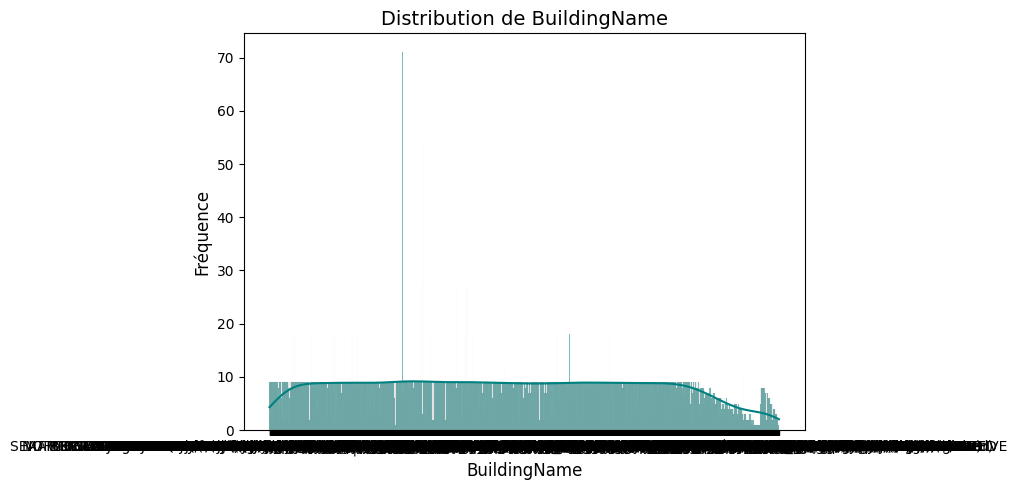

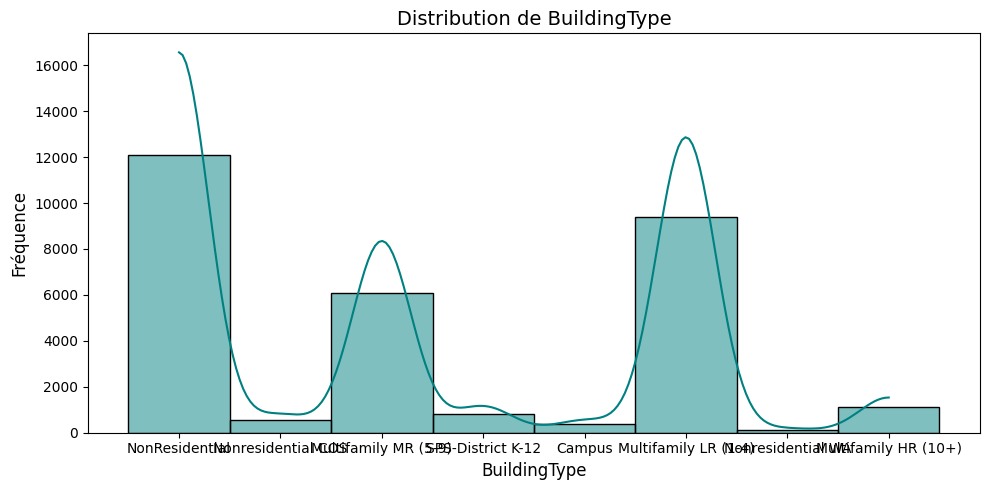

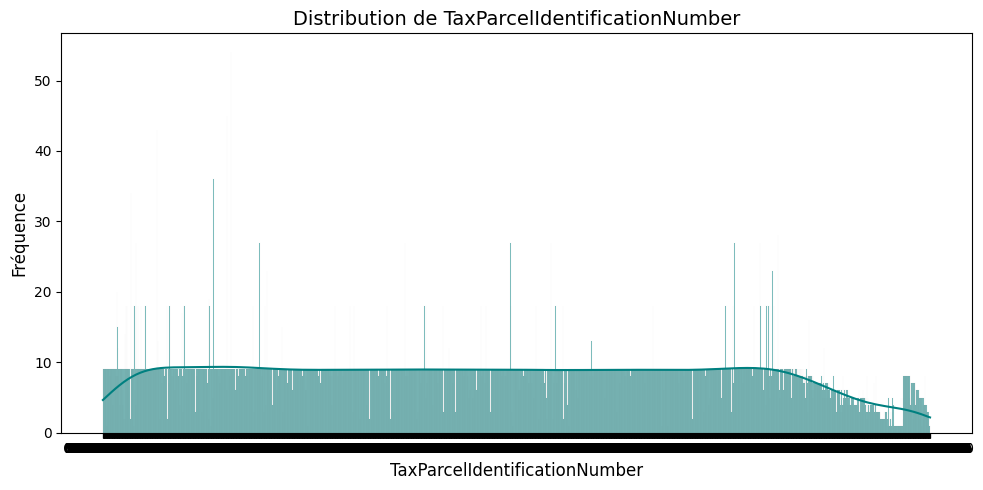

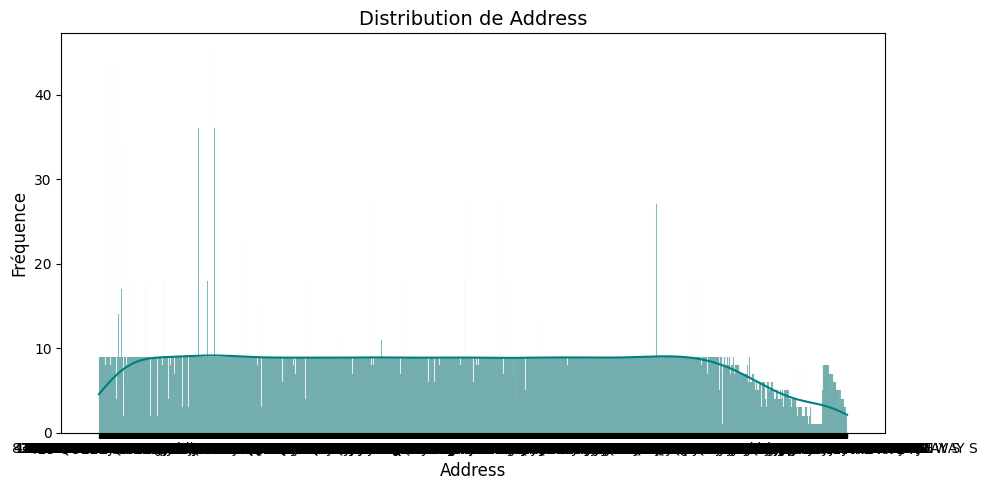

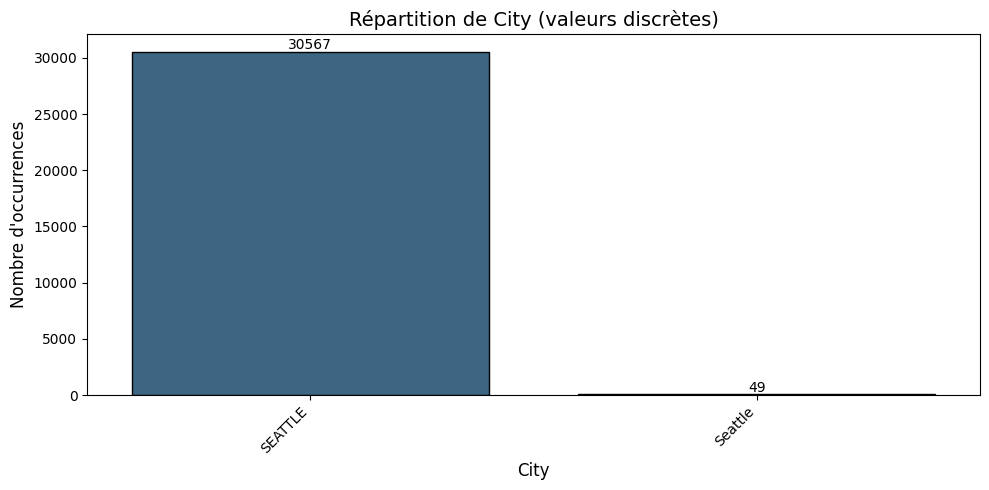

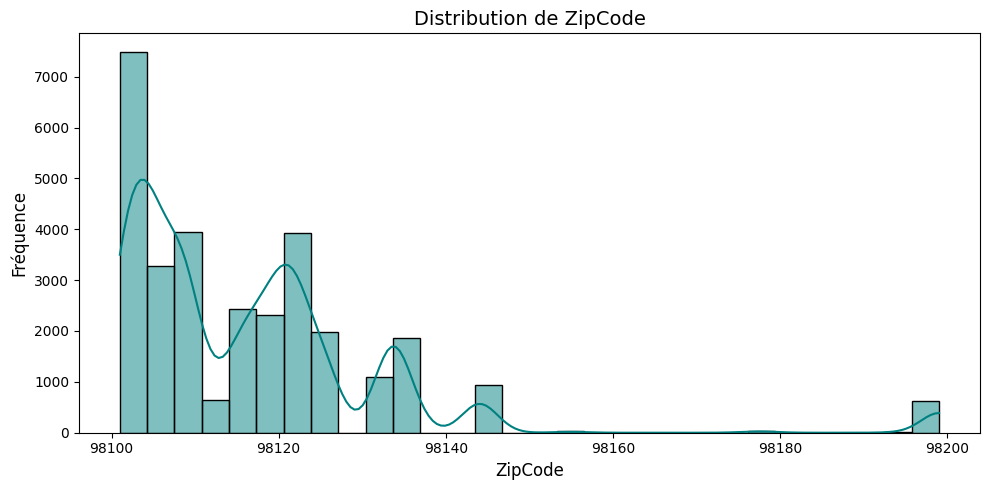

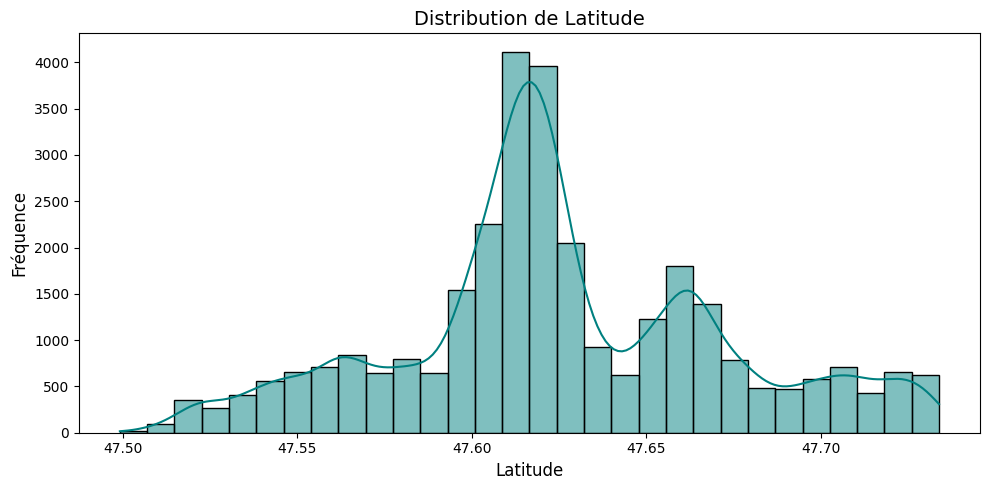

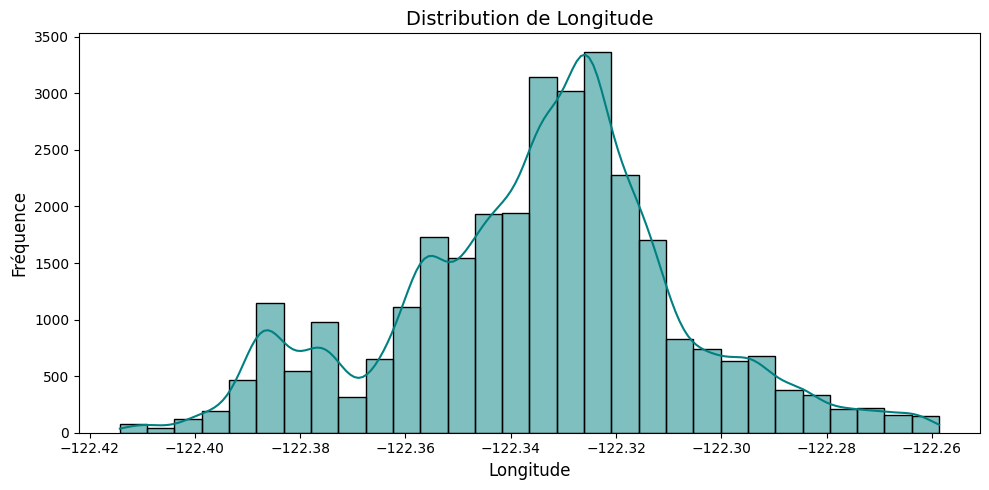

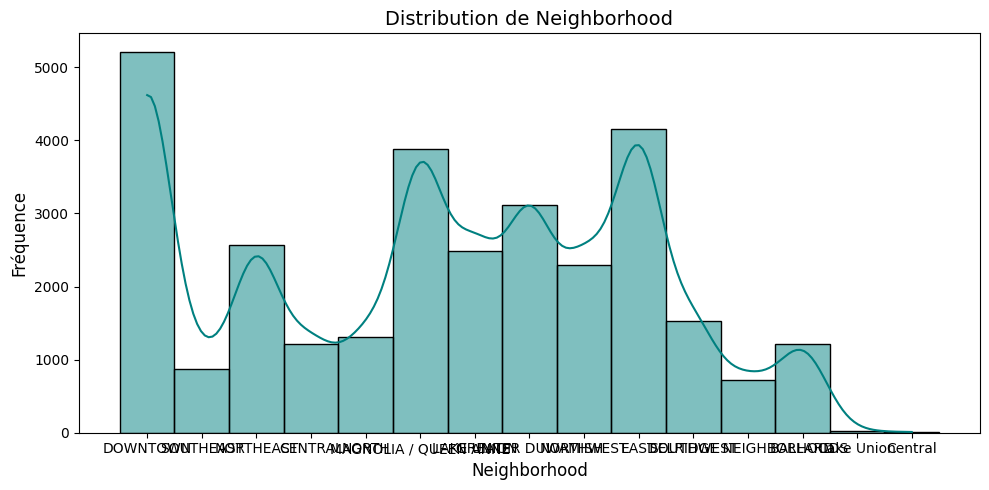

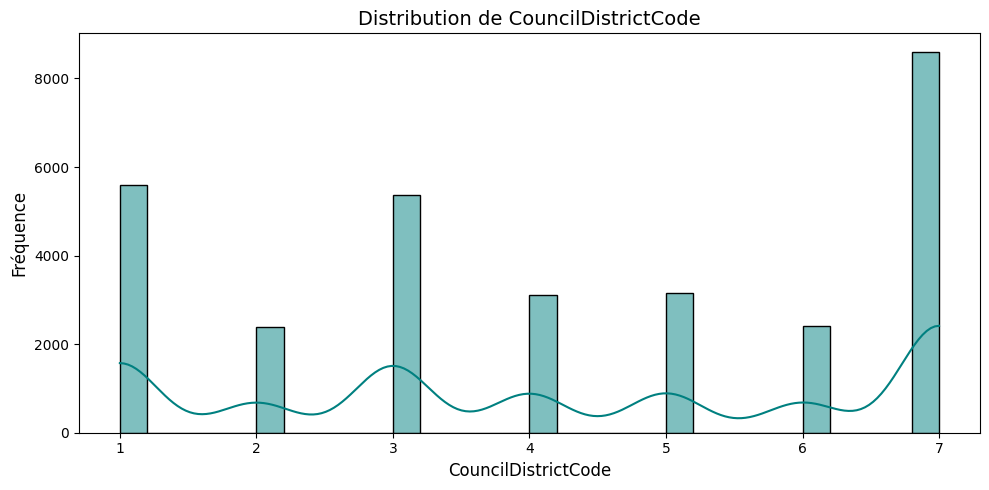

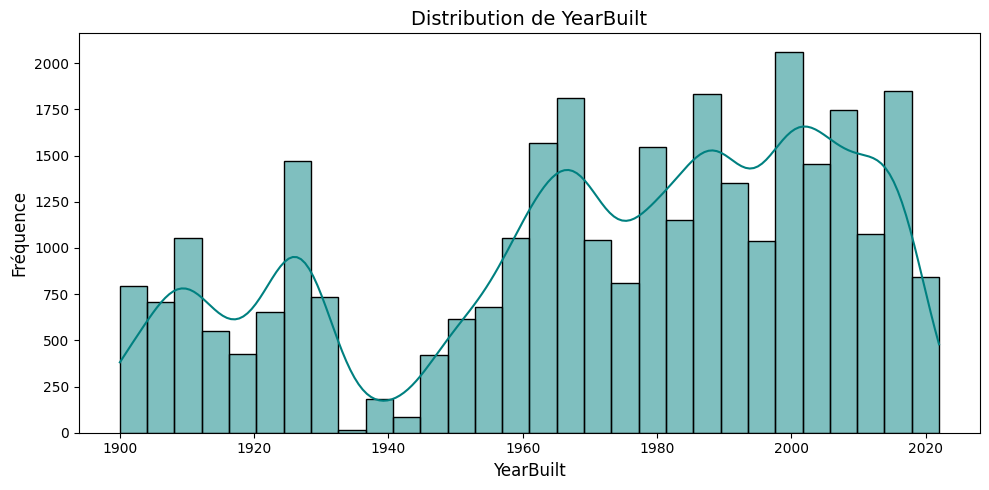

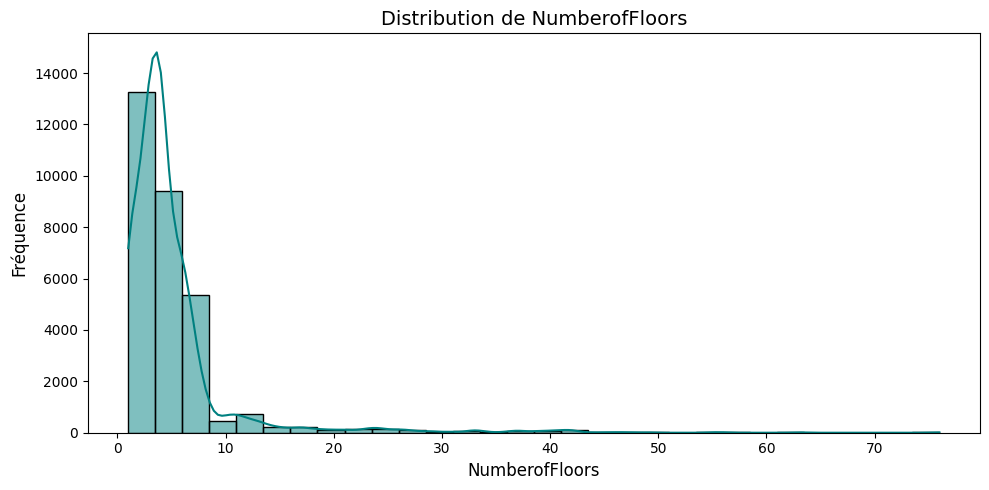

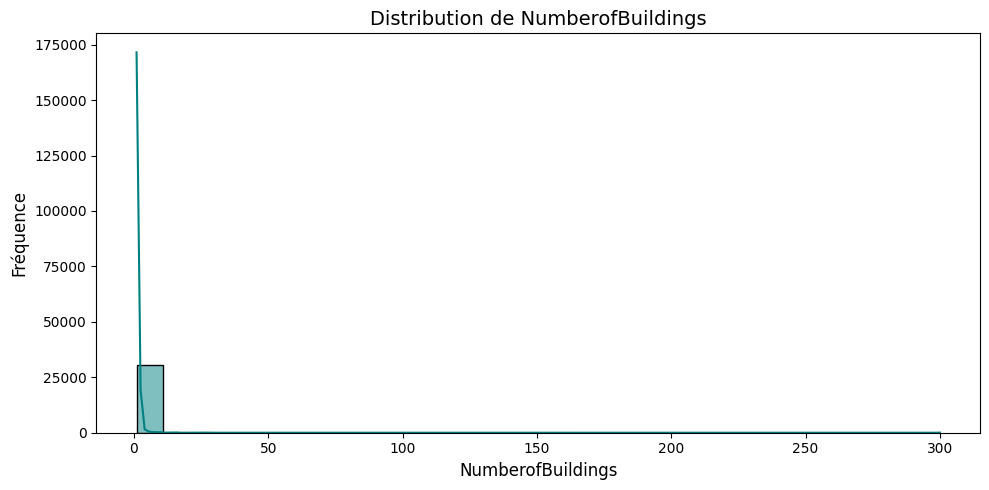

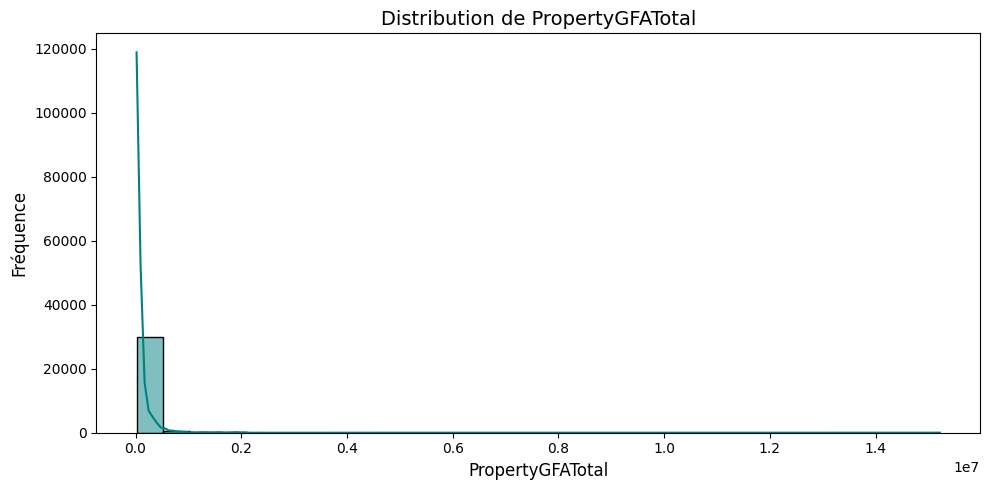

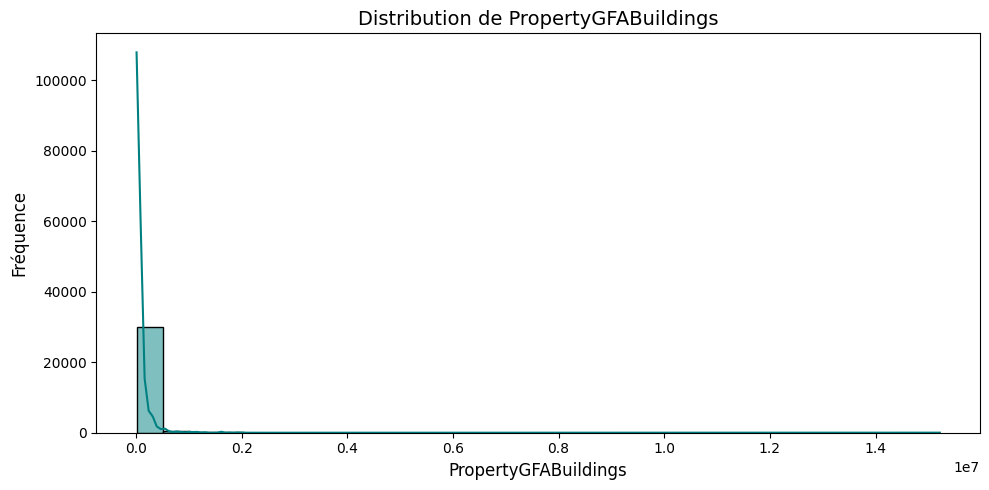

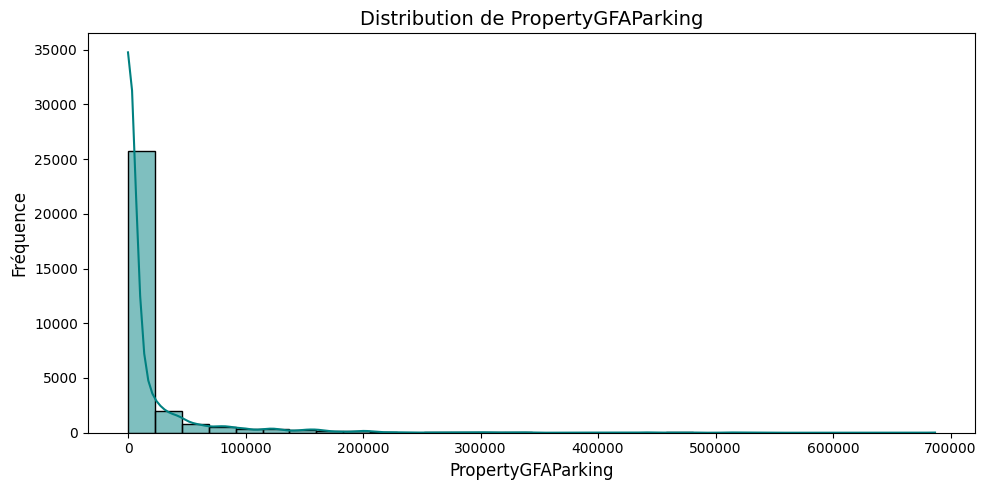

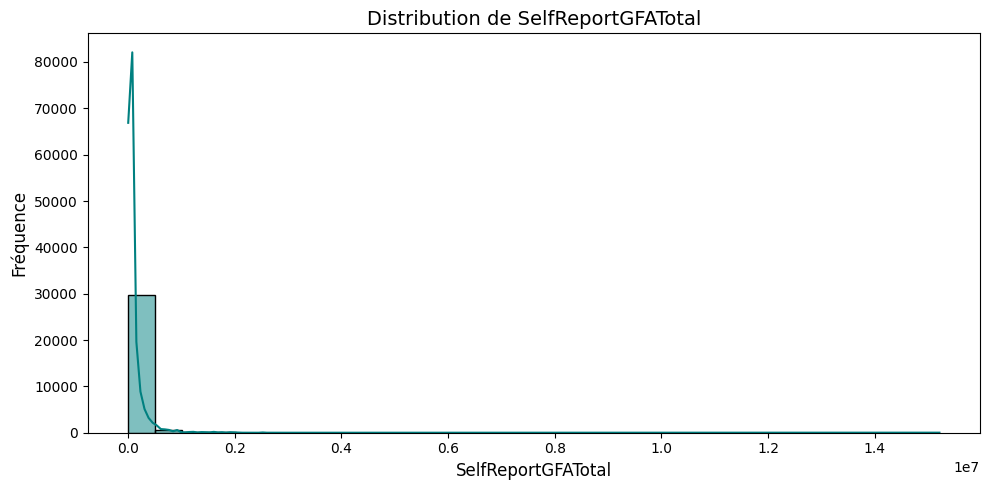

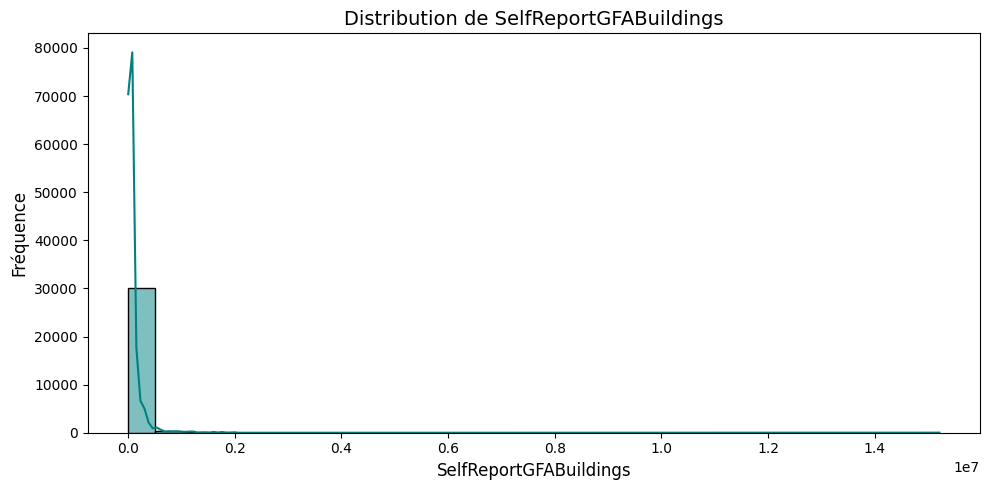

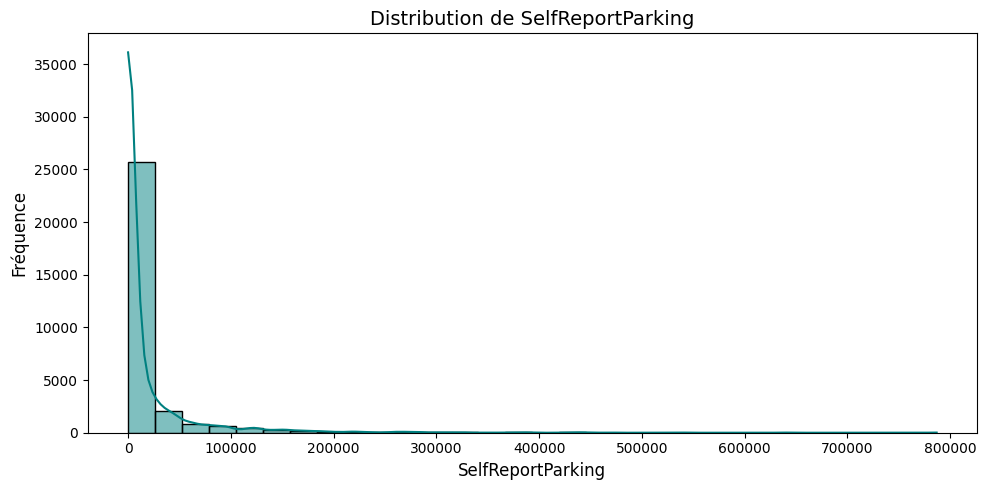

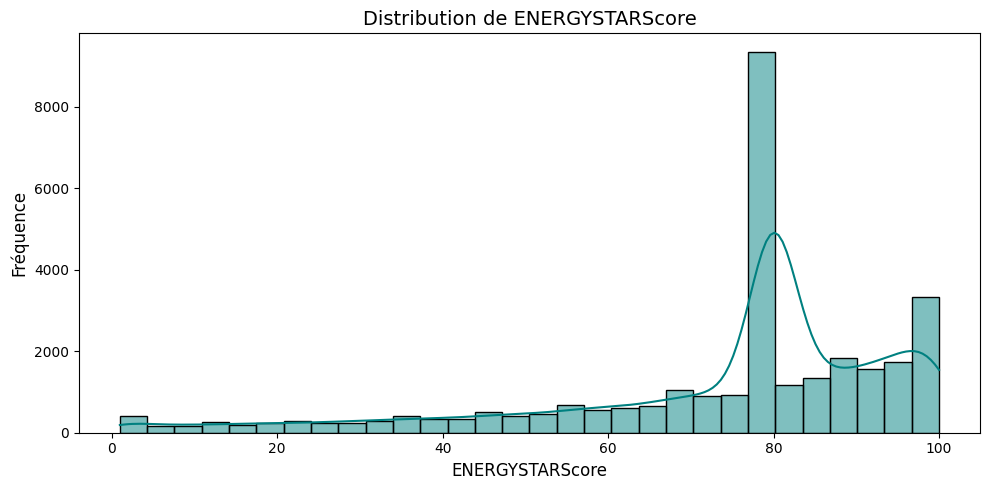

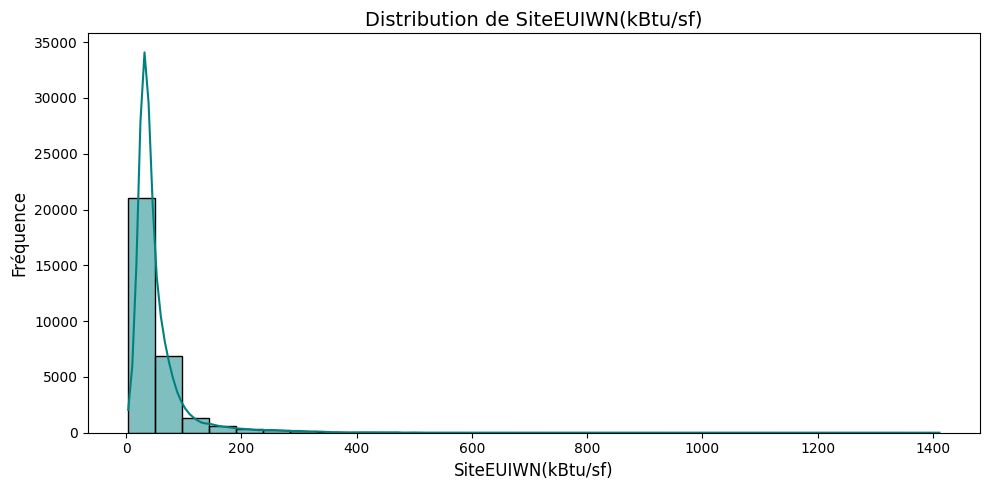

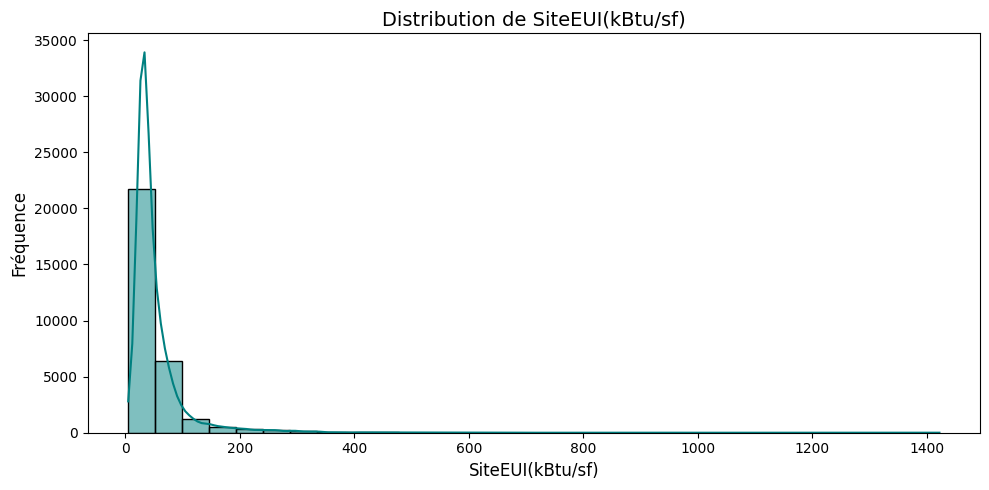

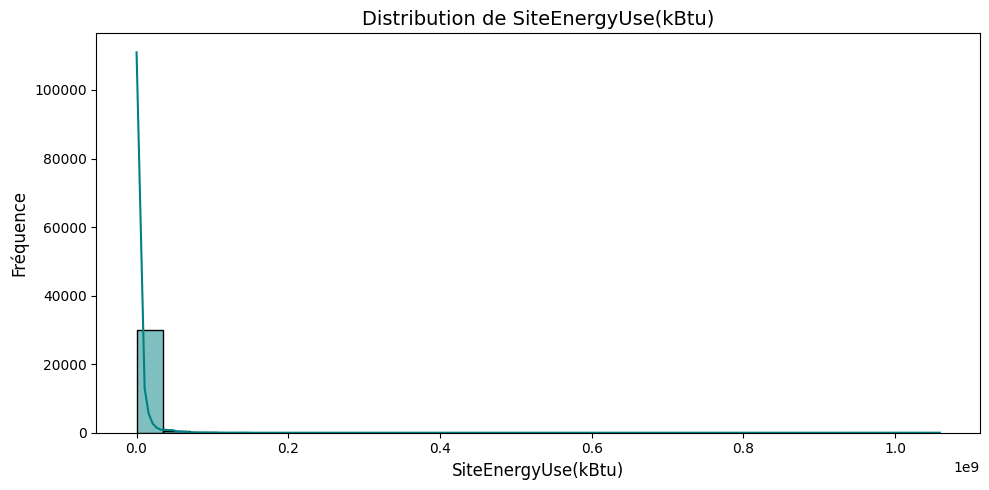

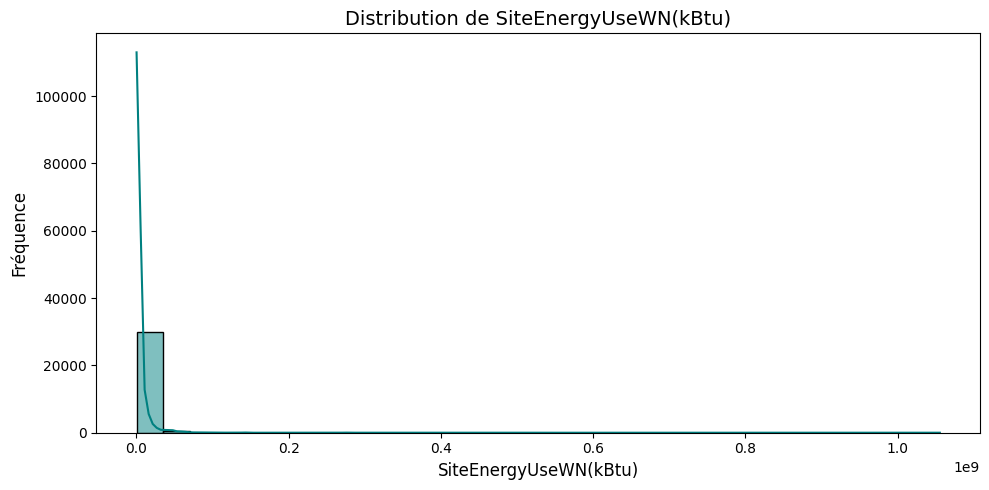

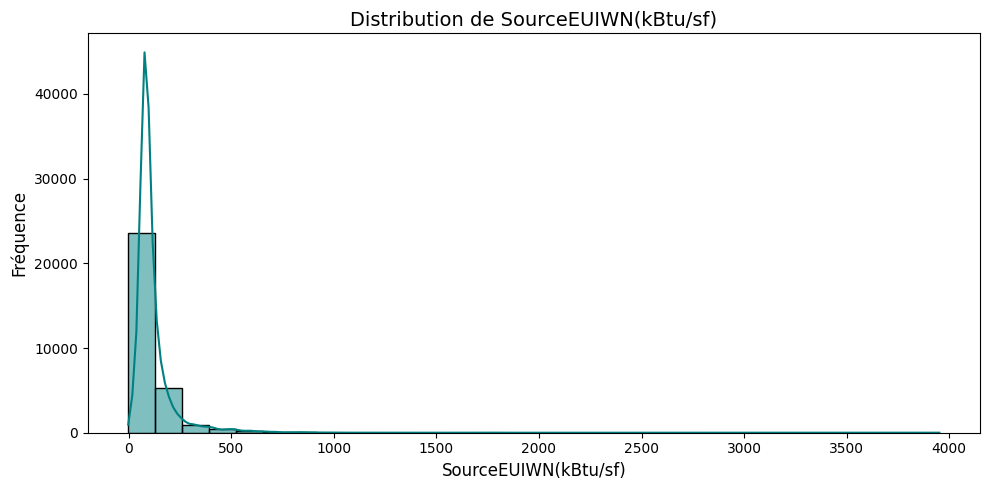

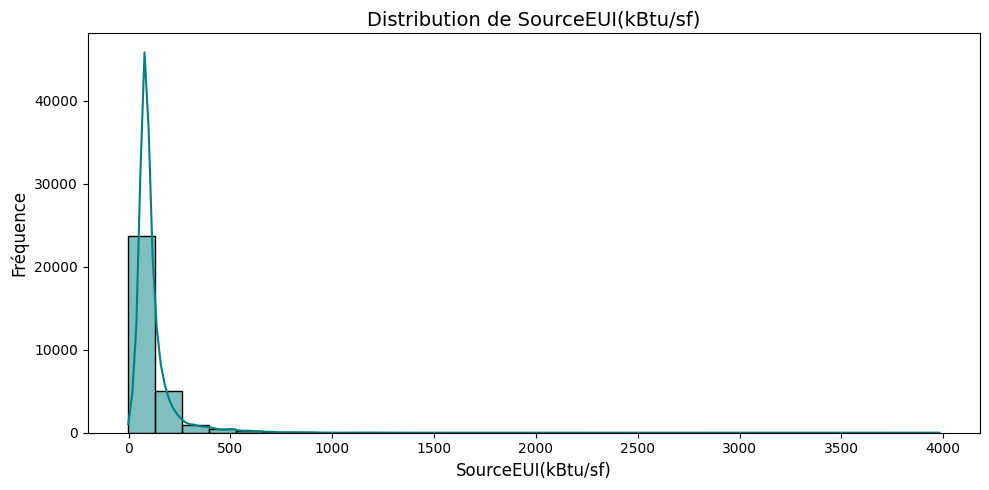

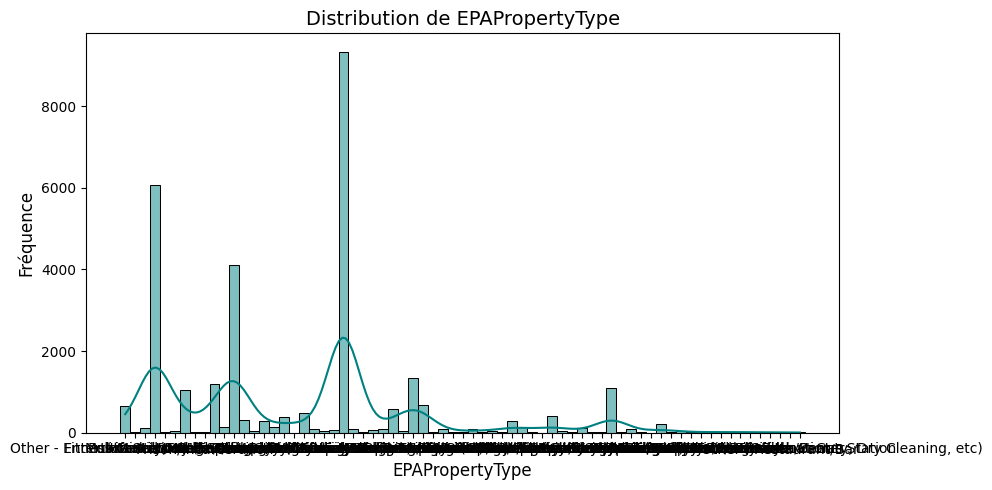

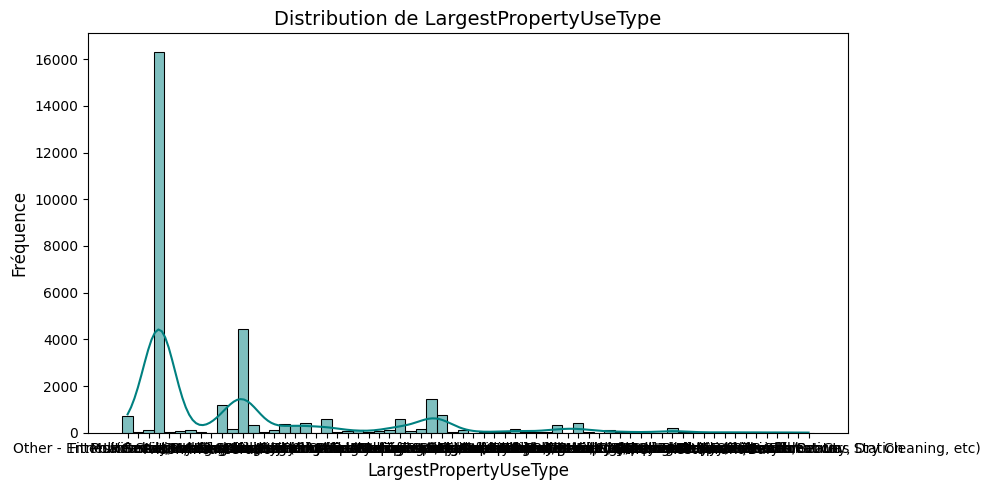

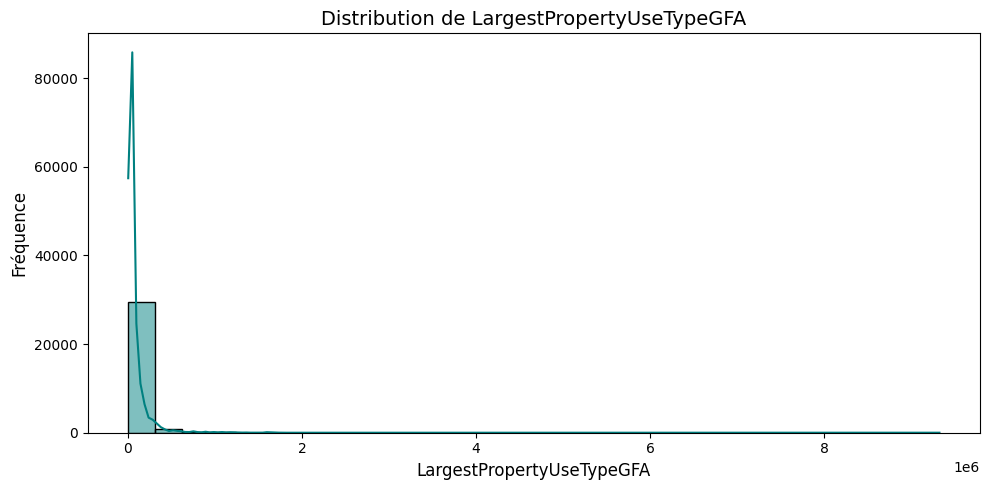

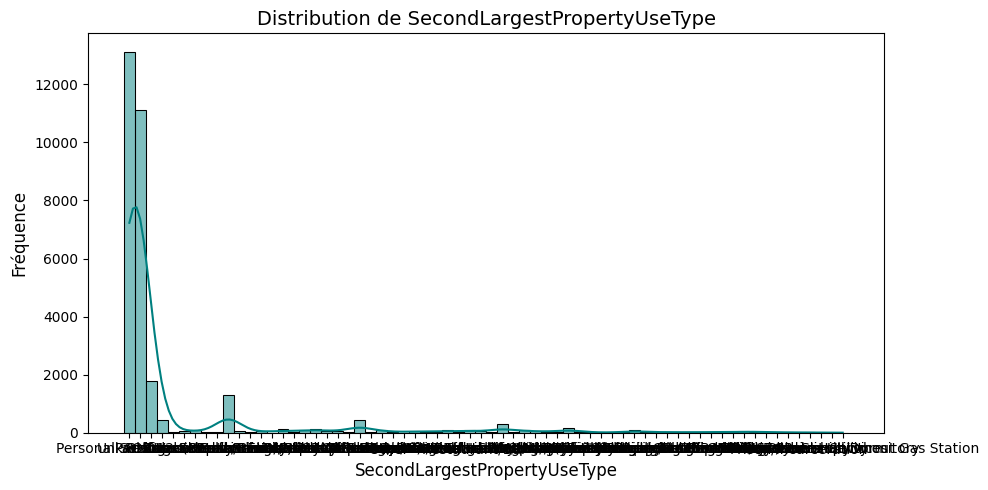

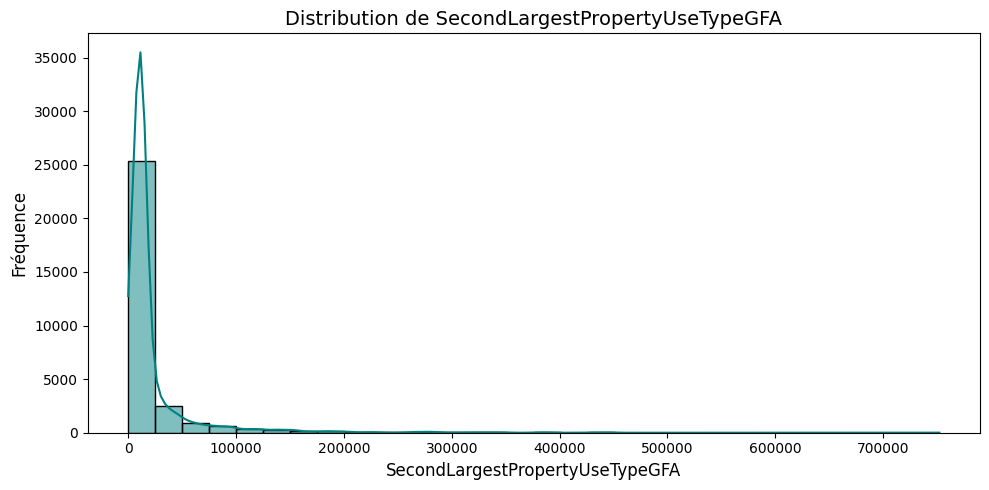

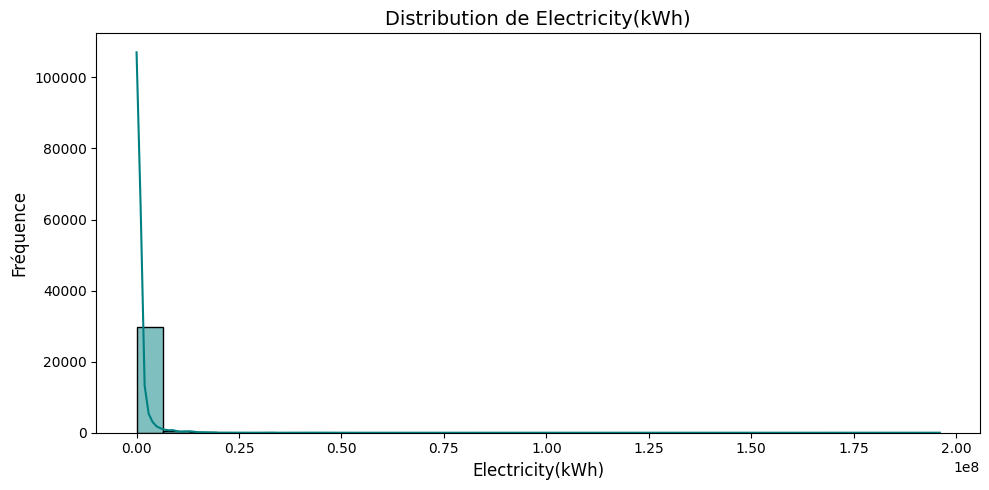

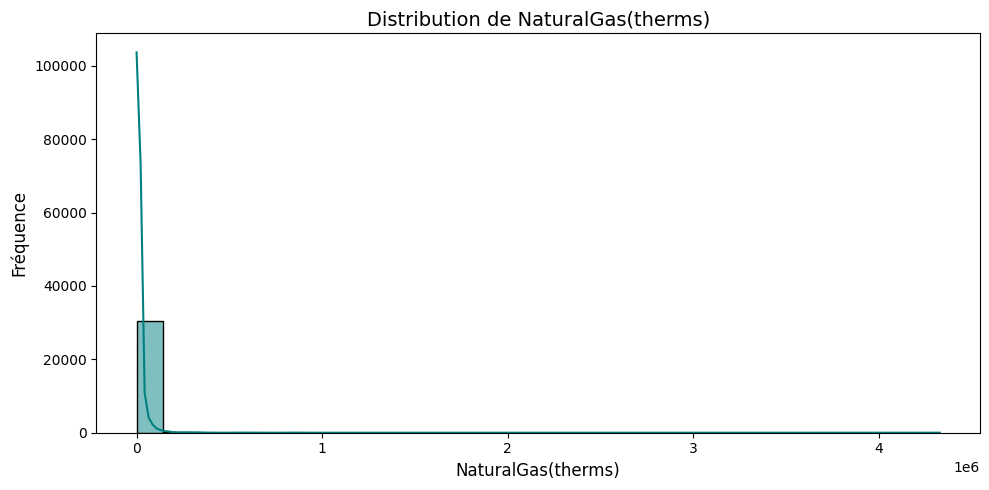

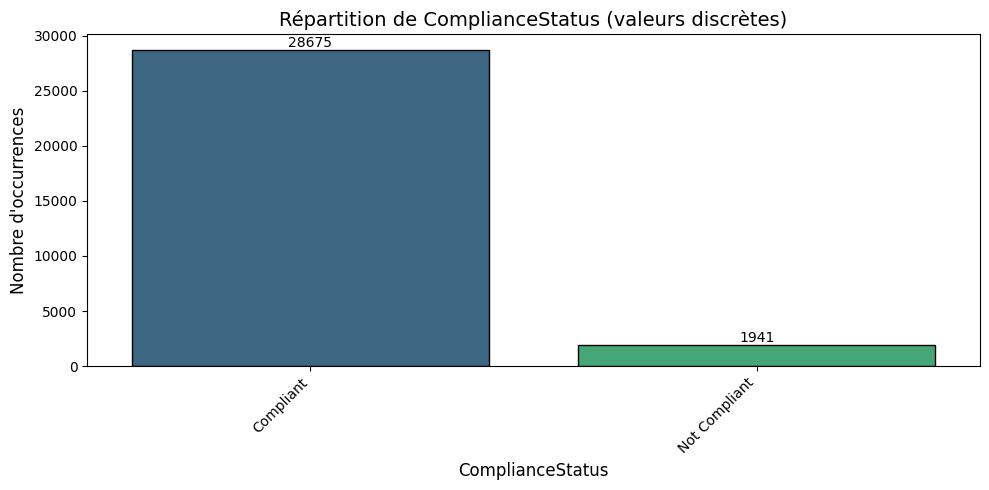

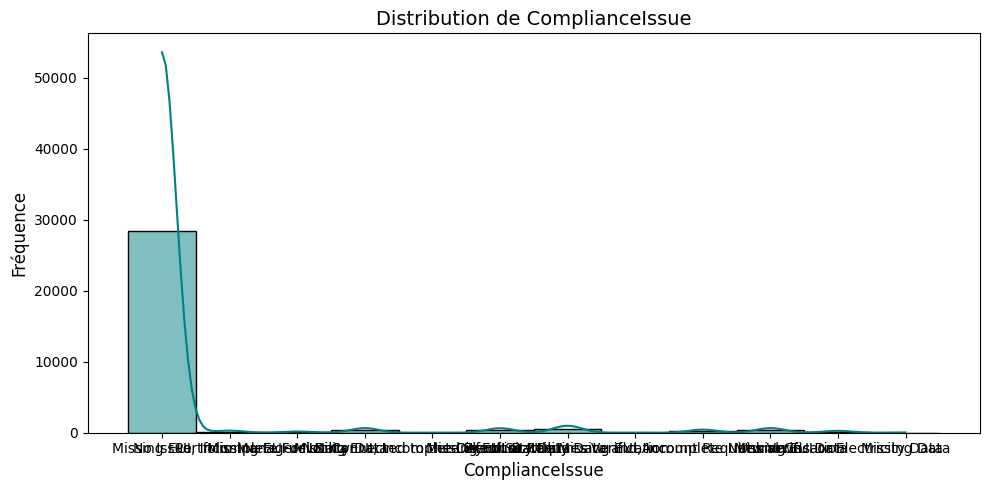

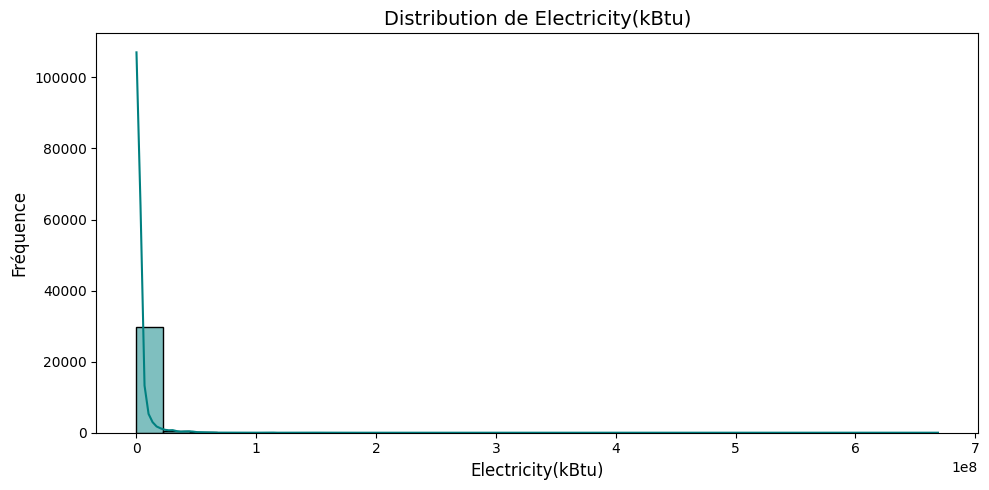

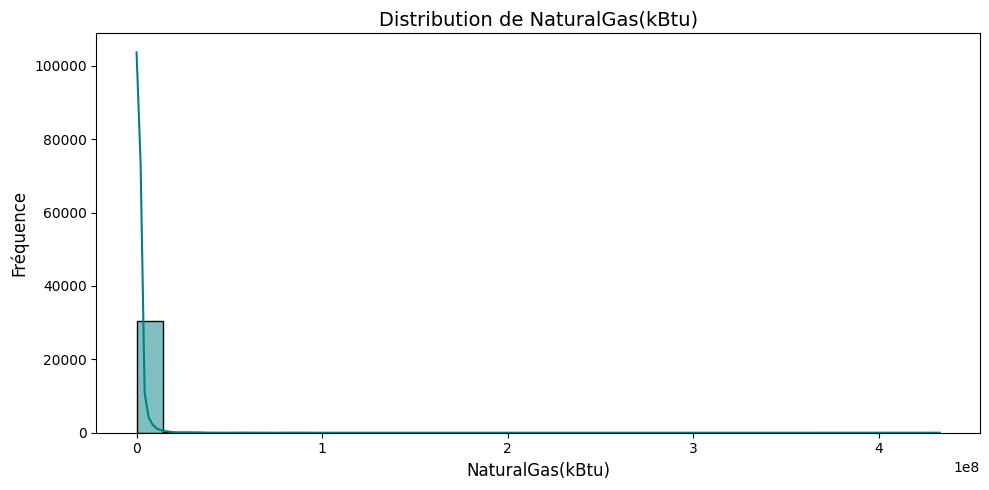

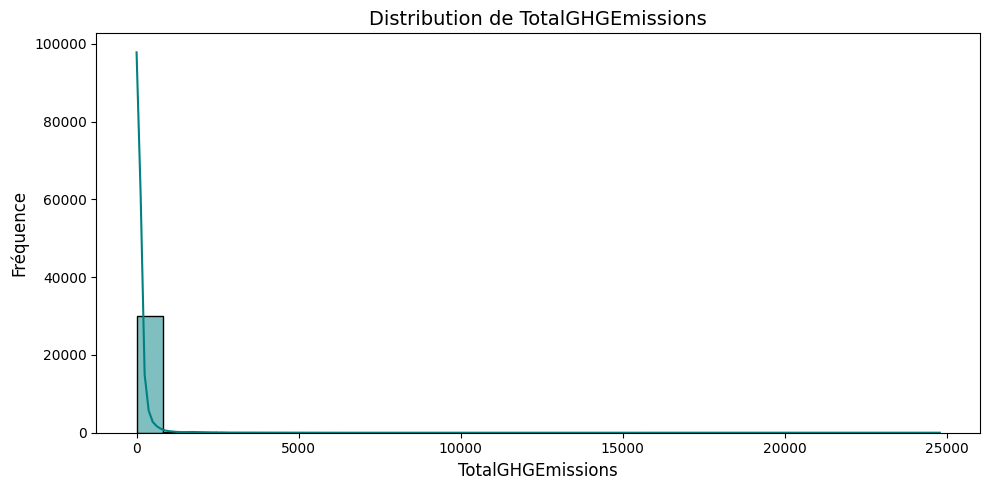

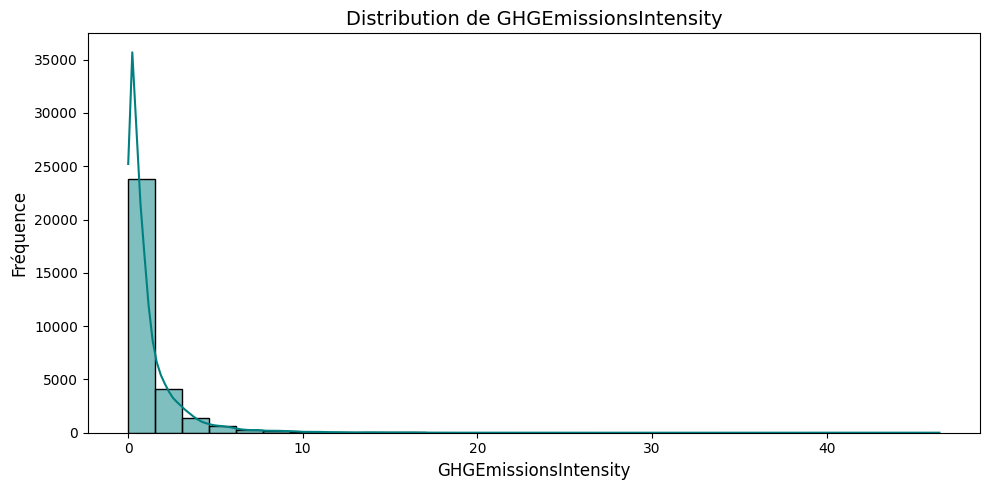

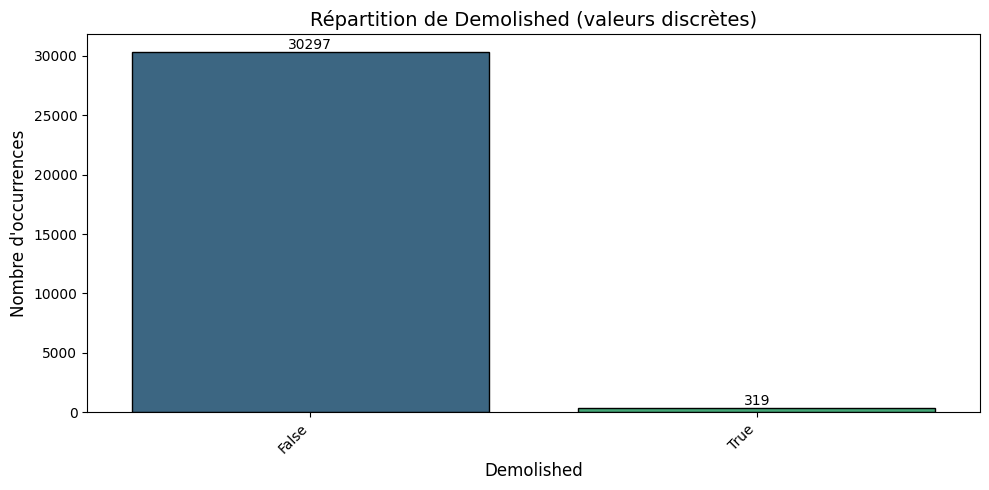

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# Supprimer les colonnes non informatives (ex: constantes ou quasi-constantes)
single_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
df_clean = df.drop(columns=single_value_cols)

# Afficher les distributions pour les colonnes restantes
for col in df_clean.columns:
    unique_count = df_clean[col].nunique()
    
    # Ignorer les colonnes avec moins de 2 valeurs uniques
    if unique_count < 2:
        print(f"Ignorer la colonne '{col}' : elle a moins de 2 valeurs uniques.")
        continue
    
    plt.figure(figsize=(10, 5))
    
    if unique_count < 5:
        # Diagramme en barres pour les variables discrètes
        value_counts = df_clean[col].value_counts()
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis', edgecolor='black')
        
        # Ajouter les valeurs sur les barres
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points',
                        fontsize=10)
        
        plt.title(f"Répartition de {col} (valeurs discrètes)", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Nombre d'occurrences", fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes
    else:
        # Histogramme pour les variables continues
        sns.histplot(df_clean[col], bins=30, kde=True, color='teal', edgecolor='black')
        plt.title(f"Distribution de {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Fréquence", fontsize=12)
    
    plt.tight_layout()
    plt.show()

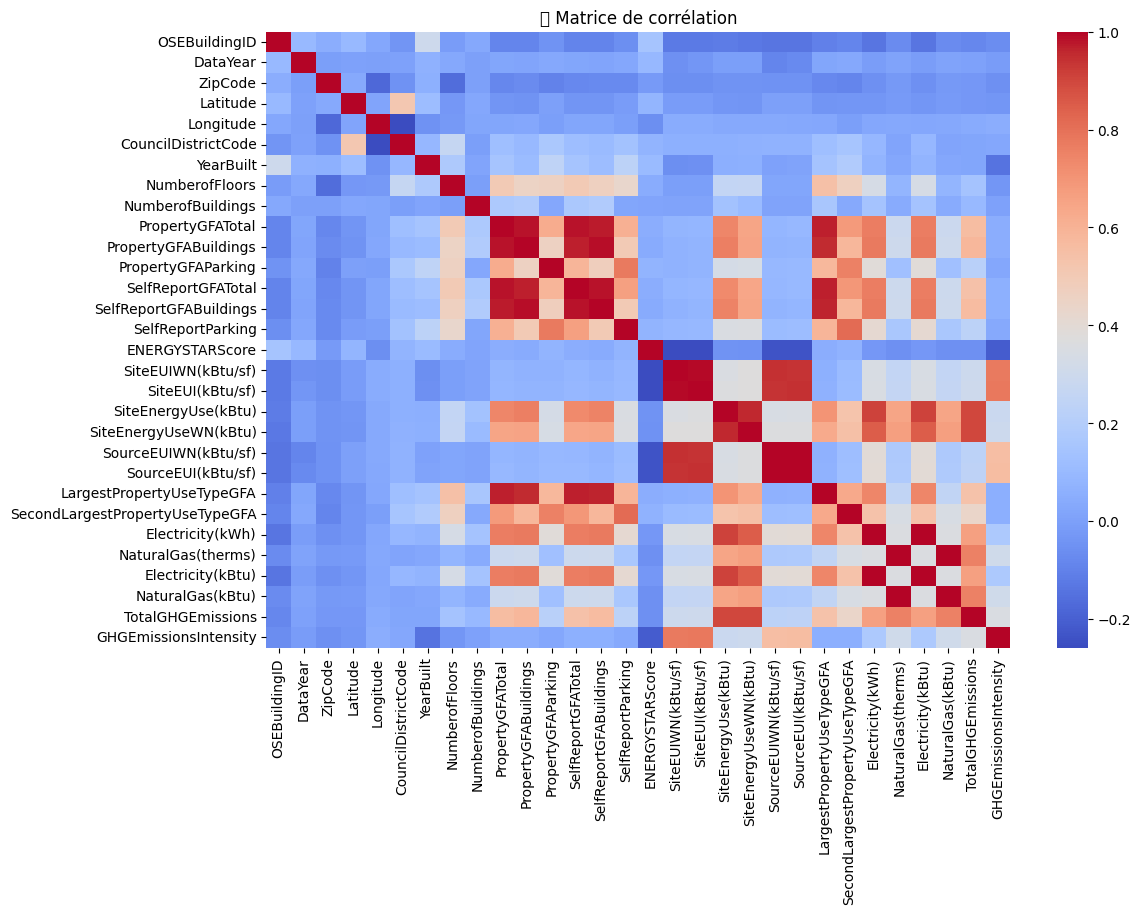

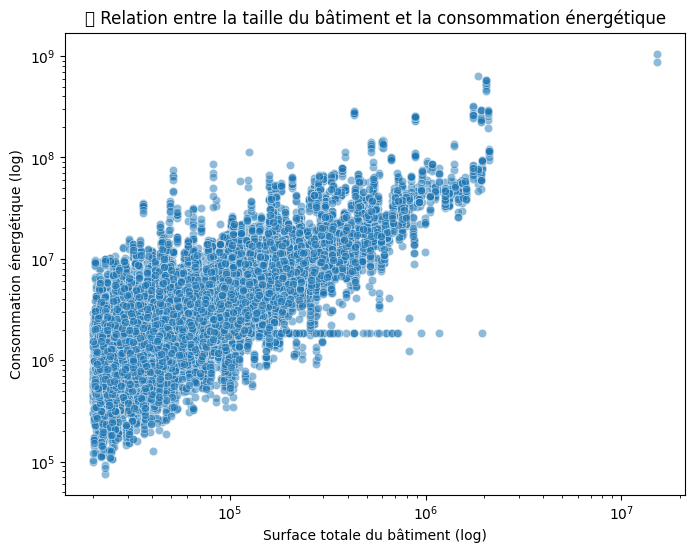

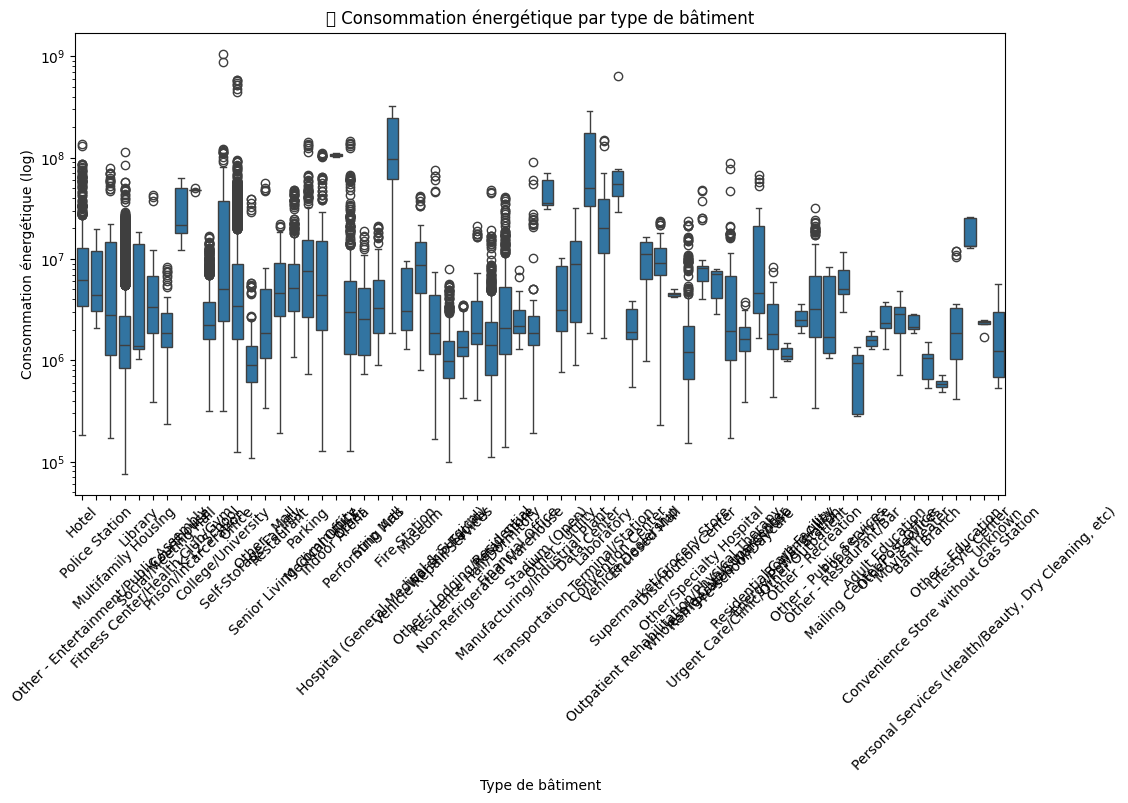

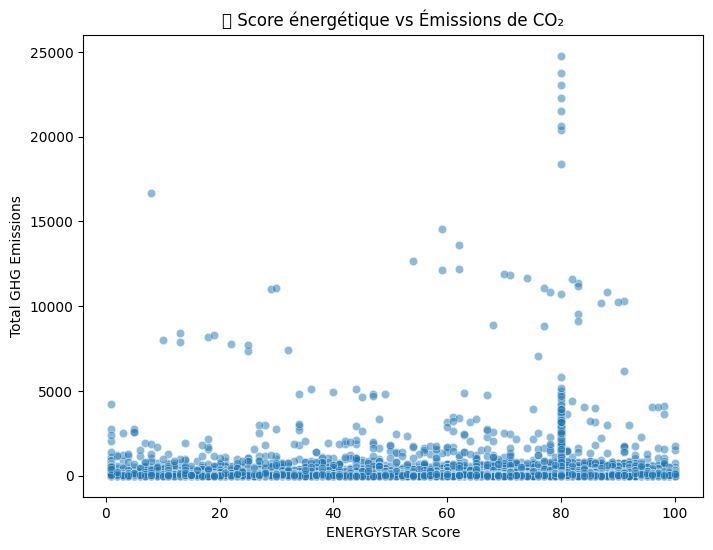

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1. Matrice de corrélation
# ---------------------------
plt.figure(figsize=(14, 10))  # Taille augmentée
sns.heatmap(
    df.select_dtypes(include=['number']).corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)
plt.title("📊 Matrice de corrélation des variables numériques", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotation des labels
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Taille vs Consommation
# ---------------------------
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=df,
    x='PropertyGFATotal',
    y='SiteEnergyUse(kBtu)',
    alpha=0.6,
    edgecolor='w',
    linewidth=0.3
)
ax.set(xscale="log", yscale="log")
plt.title("📊 Relation taille/consommation énergétique", fontsize=14)
plt.xlabel("Surface totale (m², échelle log)", fontsize=12)
plt.ylabel("Consommation énergétique (kBtu, échelle log)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Consommation par type de bâtiment (AMÉLIORÉ)
# ---------------------------
plt.figure(figsize=(14, 8))  # Taille augmentée

# Tri des types par consommation médiane
order = df.groupby('LargestPropertyUseType')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False).index

sns.boxplot(
    data=df,
    x='LargestPropertyUseType',
    y='SiteEnergyUse(kBtu)',
    order=order,
    palette='viridis',
    showfliers=False  # Masque les outliers pour plus de lisibilité
)

plt.yscale('log')
plt.title("📊 Consommation énergétique par type de bâtiment", fontsize=14)
plt.xlabel("")
plt.ylabel("Consommation (kBtu, échelle log)", fontsize=12)

# Rotation des labels et ajustement de l'espacement
plt.xticks(
    rotation=90,  # Rotation verticale
    ha='center',  # Alignement horizontal
    fontsize=10  # Taille de police réduite
)

# Ajustement des marges
plt.subplots_adjust(bottom=0.35)
plt.tight_layout()
plt.show()

# ---------------------------
# 4. Score énergétique vs Émissions
# ---------------------------
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='ENERGYSTARScore',
    y='TotalGHGEmissions',
    alpha=0.6,
    hue='BuildingType',  # Ajout d'une légende catégorielle
    palette='tab20',
    s=80
)
plt.title("📊 Score ENERGYSTAR vs Émissions de GES", fontsize=14)
plt.xlabel("Score énergétique", fontsize=12)
plt.ylabel("Émissions totales (CO₂eq)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende déportée
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()